In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [ ]:
df = pd.read_csv(r"/content/heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
df.shape

(319795, 18)

In [ ]:
df.dropna(axis=0)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


<Axes: xlabel='HeartDisease', ylabel='count'>

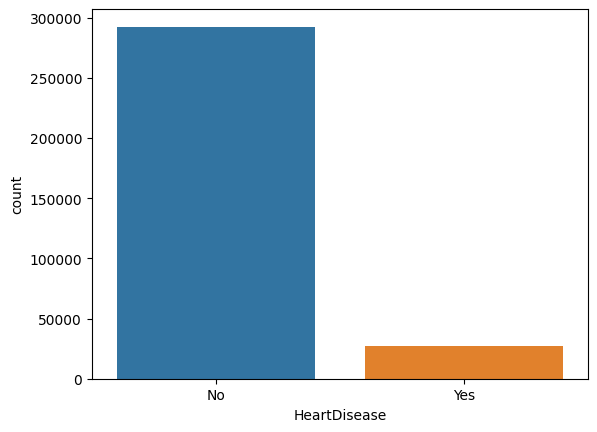

In [ ]:
sns.countplot(x='HeartDisease',data=df)

In [ ]:
df.duplicated().sum()

18078

In [ ]:
df2=df.copy()

In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.shape

(301717, 18)

In [ ]:
df2.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

BMI                  Axes(0.125,0.747241;0.133621x0.132759)
PhysicalHealth    Axes(0.285345,0.747241;0.133621x0.132759)
MentalHealth       Axes(0.44569,0.747241;0.133621x0.132759)
SleepTime         Axes(0.606034,0.747241;0.133621x0.132759)
dtype: object

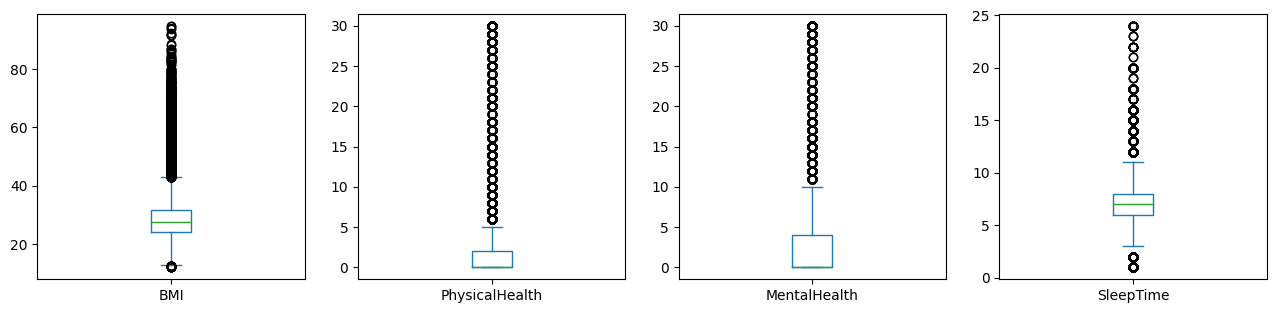

In [ ]:
df2.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (5,5))

In [ ]:
cols = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']

In [ ]:
def countunique(row):
    print( row+'\n',df2[row].unique())

In [ ]:
for c in cols:
    countunique(c)

HeartDisease
 ['No' 'Yes']
Smoking
 ['Yes' 'No']
AlcoholDrinking
 ['No' 'Yes']
Stroke
 ['No' 'Yes']
DiffWalking
 ['No' 'Yes']
Sex
 ['Female' 'Male']
AgeCategory
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
 ['Yes' 'No']
GenHealth
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma
 ['Yes' 'No']
KidneyDisease
 ['No' 'Yes']
SkinCancer
 ['Yes' 'No']


In [ ]:
from sklearn.preprocessing import LabelEncoder
E=df2[cols]
E=E.apply(LabelEncoder().fit_transform)

In [ ]:
E.dtypes

HeartDisease        int64
Smoking             int64
AlcoholDrinking     int64
Stroke              int64
DiffWalking         int64
Sex                 int64
AgeCategory         int64
Race                int64
Diabetic            int64
PhysicalActivity    int64
GenHealth           int64
Asthma              int64
KidneyDisease       int64
SkinCancer          int64
dtype: object

In [ ]:
df2.update(E)

In [ ]:
df2.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
df2[cols] =df2[cols].apply(pd.to_numeric)

In [ ]:
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


<Axes: xlabel='HeartDisease', ylabel='count'>

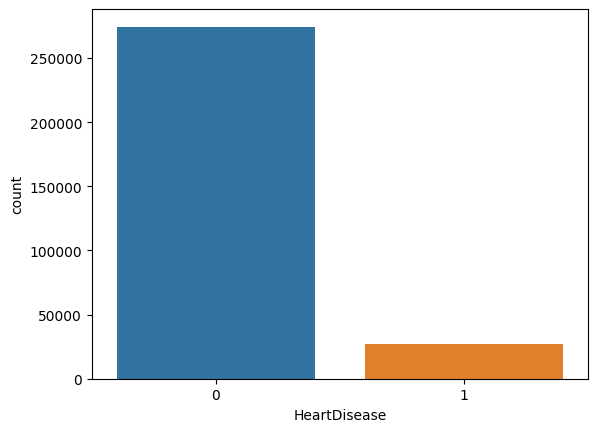

In [ ]:
sns.countplot(data=df2,x='HeartDisease')

   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0   

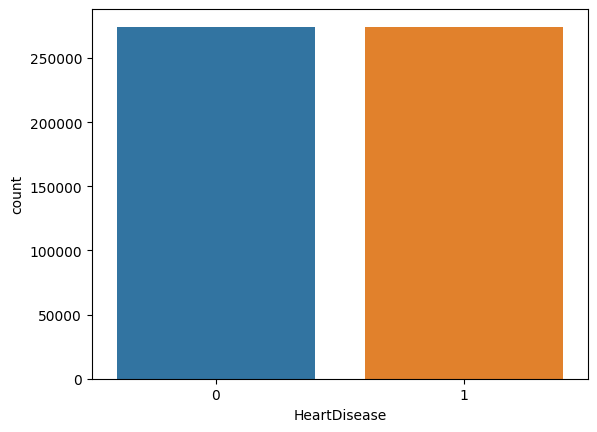

In [ ]:
from sklearn.utils import resample
Y=df2['HeartDisease']
df_majority = df2[Y == 0]

df_minority = df2[Y == 1]
size_major = len(df_majority)

y_majority = Y[Y == 0]
y_minority = Y[Y == 1]

# Downsample majority class
df_minority_upsampled = resample(df_minority,
                   replace=True,    # sample with replacement
                   n_samples=size_major,    # to match majority class
                   random_state=42)  # reproducible results

X = pd.concat([df_majority, df_minority_upsampled])
y_minority_upsampled = y_minority[df_minority_upsampled.index]
Y = pd.concat([y_majority, y_minority_upsampled])

sns.countplot(x = Y);
print(X.head(),Y.head())
print(Y.shape,Y.shape)

In [ ]:
X

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1,29.29,1,0,0,0.0,30.0,0,0,10,5,2,0,2,7.0,0,0,0
53376,1,29.83,0,0,0,0.0,0.0,1,0,8,5,2,1,2,7.0,1,0,1
53992,1,22.27,1,0,0,0.0,7.0,0,0,4,3,2,1,2,6.0,1,0,0
1067,1,26.61,1,0,1,20.0,20.0,1,1,11,5,2,0,1,10.0,1,0,0


In [ ]:
X.drop(columns=['HeartDisease','MentalHealth','DiffWalking','Race','KidneyDisease','SkinCancer'],inplace=True)

In [ ]:
df = pd.concat([X, Y], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y , test_size= 0.20 , random_state= 42)

In [ ]:
lrc = LogisticRegression(C=0.1, max_iter=1000)
lrc.fit(X_train, Y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lrc = lrc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_lrc)
conf_matrix = confusion_matrix(Y_test, y_pred_lrc)
classification_rep = classification_report(Y_test, y_pred_lrc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7426924022845067
Confusion Matrix:
[[39408 15529]
 [12719 42127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     54937
           1       0.73      0.77      0.75     54846

    accuracy                           0.74    109783
   macro avg       0.74      0.74      0.74    109783
weighted avg       0.74      0.74      0.74    109783



<Axes: >

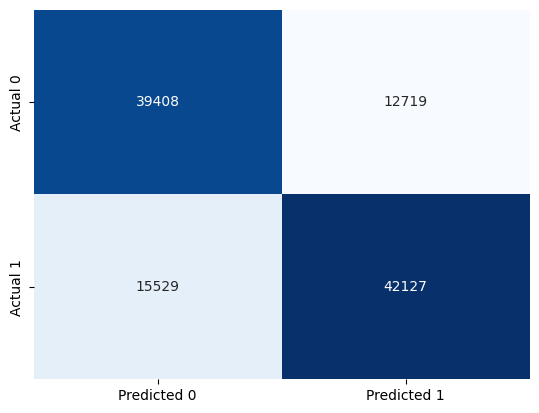

In [ ]:
cm_lrc = confusion_matrix(y_pred_lrc, Y_test)

sns.heatmap(cm_lrc, annot = True, fmt = 'd', cmap = 'Blues', cbar = False,
           xticklabels = ['Predicted 0', 'Predicted 1'],
           yticklabels = ['Actual 0', 'Actual 1'])

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)


y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_rfc)
conf_matrix = confusion_matrix(Y_test, y_pred_rfc)
classification_rep = classification_report(Y_test, y_pred_rfc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9563502545931519
Confusion Matrix:
[[50186  4751]
 [   41 54805]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     54937
           1       0.92      1.00      0.96     54846

    accuracy                           0.96    109783
   macro avg       0.96      0.96      0.96    109783
weighted avg       0.96      0.96      0.96    109783



<Axes: >

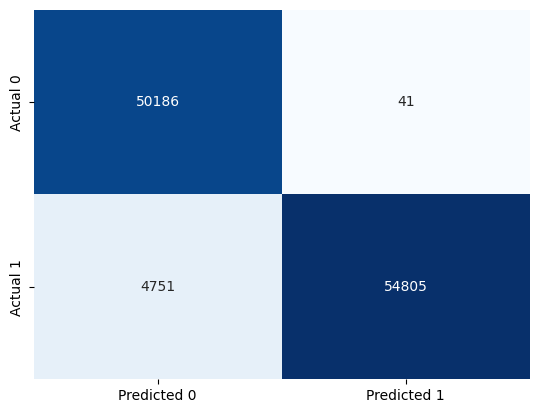

In [ ]:
cm_rfc = confusion_matrix(y_pred_rfc, Y_test)
#print(cm_svm)

sns.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', cbar = False,
           xticklabels = ['Predicted 0', 'Predicted 1'],
           yticklabels = ['Actual 0', 'Actual 1'])

In [ ]:
df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
0,16.60,1,0,0,3.0,0,7,2,1,4,5.0,1,0
1,20.34,0,0,1,0.0,0,12,0,1,4,7.0,0,0
2,26.58,1,0,0,20.0,1,9,2,1,1,8.0,1,0
3,24.21,0,0,0,0.0,0,11,0,0,2,6.0,0,0
4,23.71,0,0,0,28.0,0,4,0,1,4,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,29.29,1,0,0,0.0,0,10,2,0,2,7.0,0,1
53376,29.83,0,0,0,0.0,0,8,2,1,2,7.0,1,1
53992,22.27,1,0,0,0.0,0,4,2,1,2,6.0,1,1
1067,26.61,1,0,1,20.0,1,11,2,0,1,10.0,1,1


In [ ]:
input_data = (16.60,1,0,0,3,0,7,2,1,4,5,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
Prediction = lrc.predict(input_data_reshaped)
print(Prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
train_pred_rfc = rfc.predict(X_train)
accuracy_1 = accuracy_score(train_pred_rfc, Y_train)
print(accuracy_1)

0.9928039368841503


In [ ]:
from sklearn.metrics import accuracy_score
train_pred_lrc = lrc.predict(X_train)
accuracy_1 = accuracy_score(train_pred_lrc, Y_train)
print(accuracy_1)

0.7426382680260243


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred_dtc = dtc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_dtc)
conf_matrix = confusion_matrix(Y_test, y_pred_dtc)
classification_rep = classification_report(Y_test, y_pred_dtc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.949618793437964
Confusion Matrix:
[[49470  5467]
 [   64 54782]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     54937
           1       0.91      1.00      0.95     54846

    accuracy                           0.95    109783
   macro avg       0.95      0.95      0.95    109783
weighted avg       0.95      0.95      0.95    109783



<Axes: >

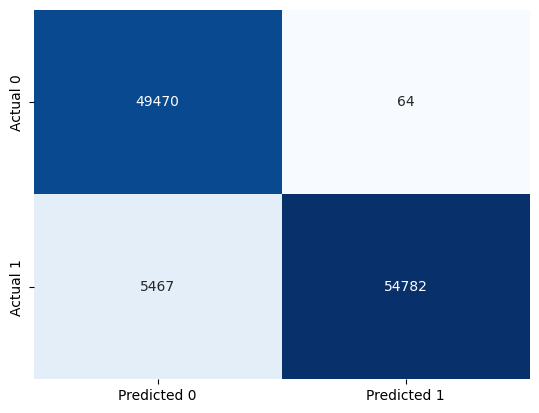

In [ ]:
cm_dtc = confusion_matrix(y_pred_dtc, Y_test)
#print(cm_svm)

sns.heatmap(cm_dtc, annot = True, fmt = 'd', cmap = 'Blues', cbar = False,
           xticklabels = ['Predicted 0', 'Predicted 1'],
           yticklabels = ['Actual 0', 'Actual 1'])

In [ ]:
from sklearn.metrics import accuracy_score
train_pred_dtc = dtc.predict(X_train)
accuracy_1 = accuracy_score(train_pred_dtc, Y_train)
print(accuracy_1)

0.9928062141193135


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier().fit(X_train, Y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_gbc)
conf_matrix = confusion_matrix(Y_test, y_pred_gbc)
classification_rep = classification_report(Y_test, y_pred_gbc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7595893717606551
Confusion Matrix:
[[39284 15653]
 [10740 44106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75     54937
           1       0.74      0.80      0.77     54846

    accuracy                           0.76    109783
   macro avg       0.76      0.76      0.76    109783
weighted avg       0.76      0.76      0.76    109783



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


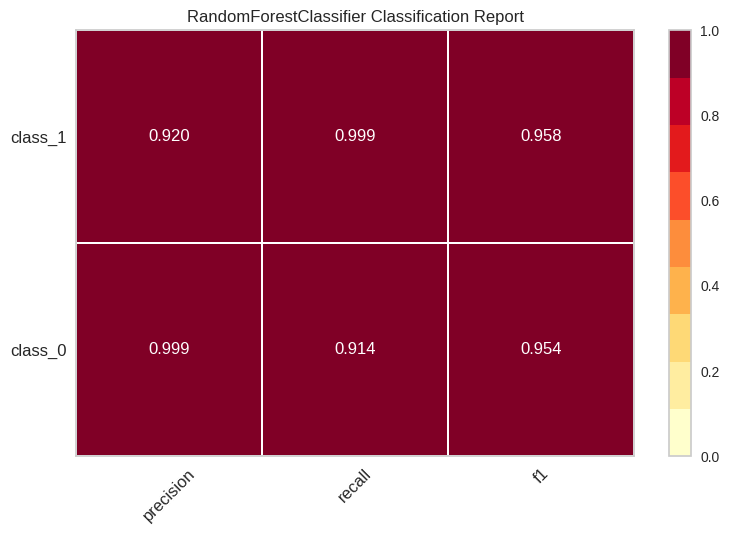

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rfc, classes=['class_0', 'class_1'])  # Adjust classes accordingly
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


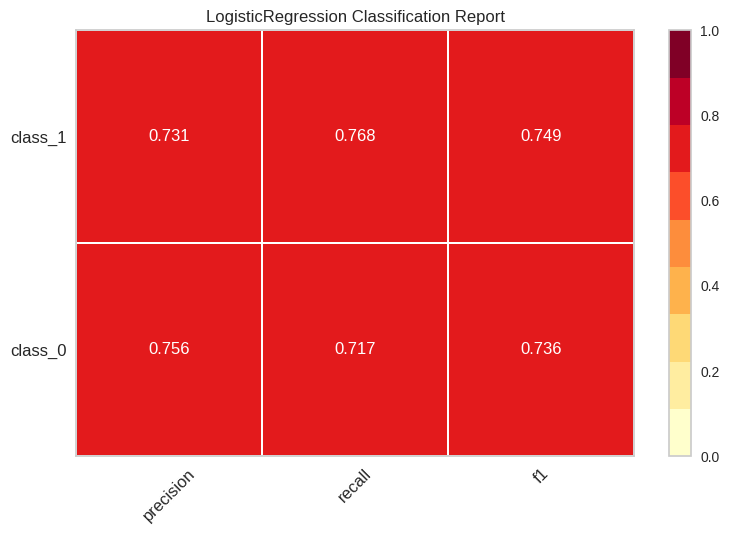

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(lrc, classes=['class_0', 'class_1'])  # Adjust classes accordingly
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


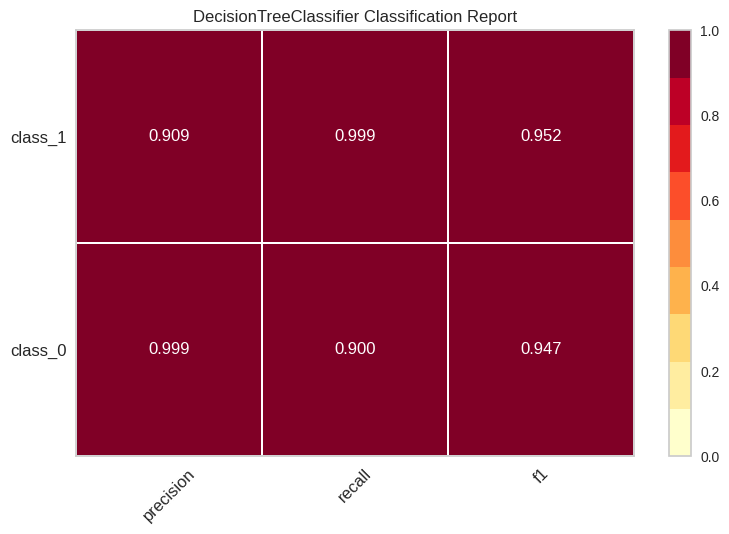

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(dtc, classes=['class_0', 'class_1'])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()

plt.show()

The ROC-AUC of the algorithm is: 0.9931


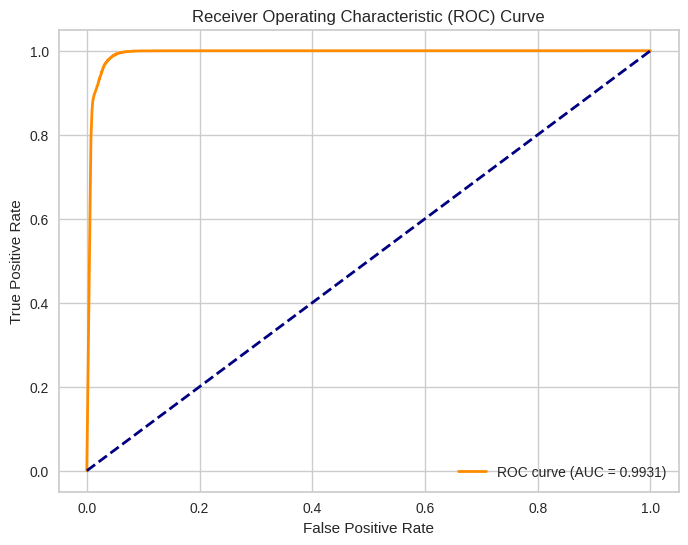

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_proba = rfc.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(Y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the algorithm is: {roc_auc}')
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC-AUC of the algorithm is: 0.8177


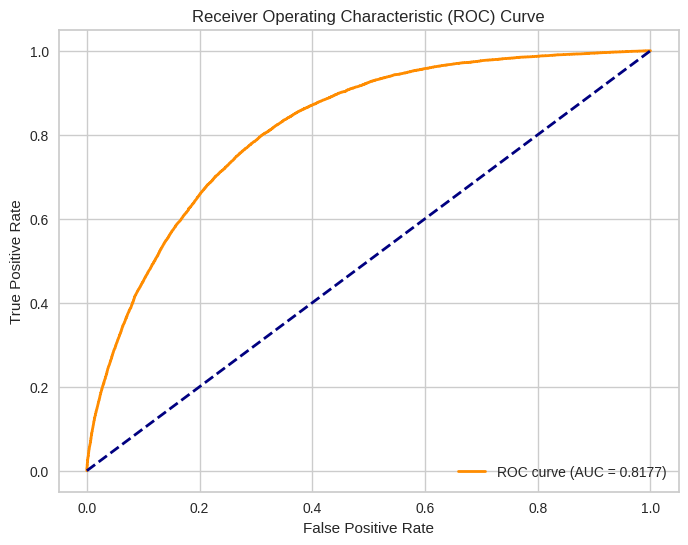

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_proba = lrc.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(Y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the algorithm is: {roc_auc}')
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC-AUC of the algorithm is: 0.9544


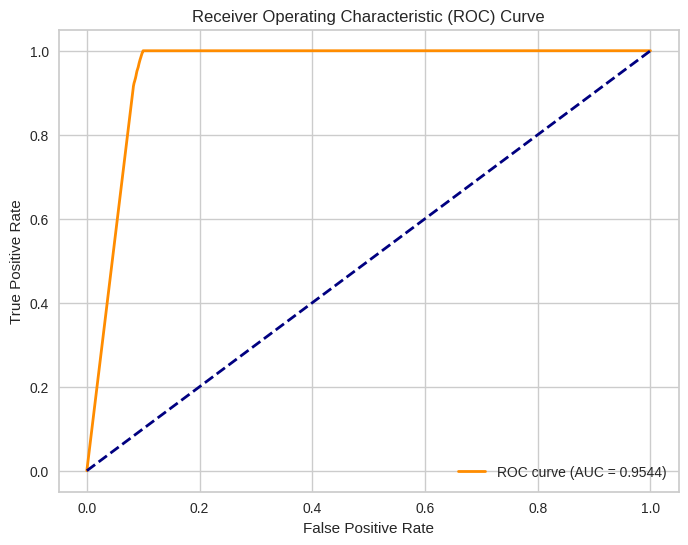

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_proba = dtc.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(Y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the algorithm is: {roc_auc}')
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

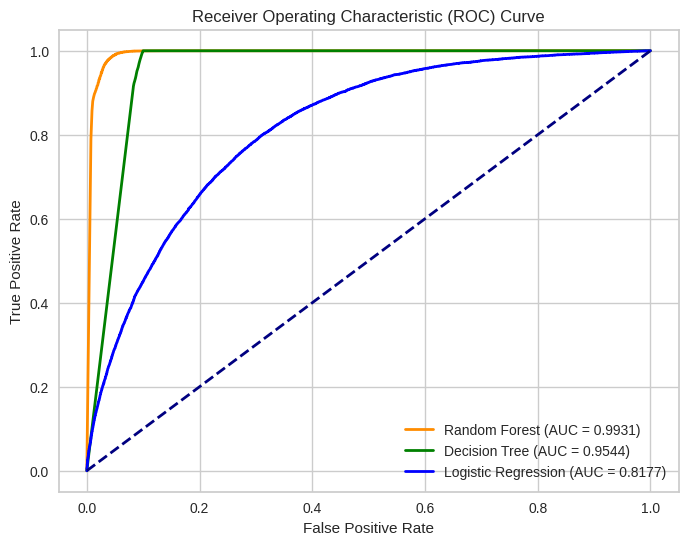

In [ ]:
y_pred_proba_rf = rfc.predict_proba(X_test)[:, 1]
y_pred_proba_dt = dtc.predict_proba(X_test)[:, 1]
y_pred_proba_lr = lrc.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUCs
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_pred_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_proba_lr)

roc_auc_rf = roc_auc_score(Y_test, y_pred_proba_rf)
roc_auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
roc_auc_lr = roc_auc_score(Y_test, y_pred_proba_lr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

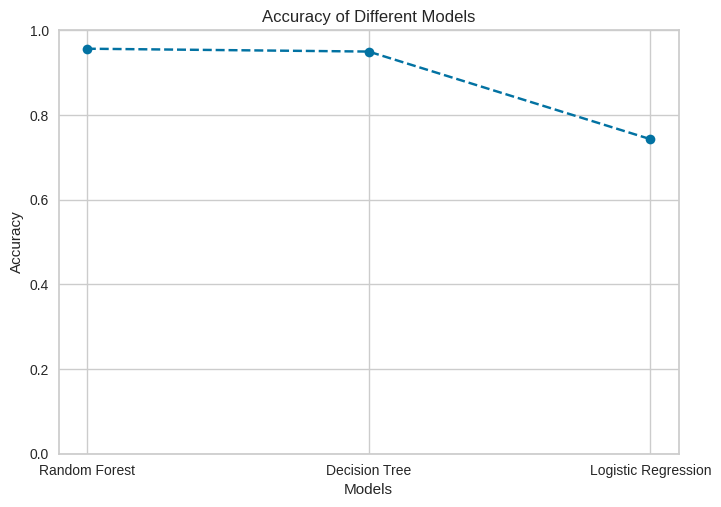

In [ ]:
accuracy_rf = accuracy_score(Y_test, y_pred_rfc)
accuracy_dt = accuracy_score(Y_test, y_pred_dtc)
accuracy_lr = accuracy_score(Y_test, y_pred_lrc)

# Plot accuracies
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_dt, accuracy_lr]

plt.plot(models, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for accuracy
plt.show()

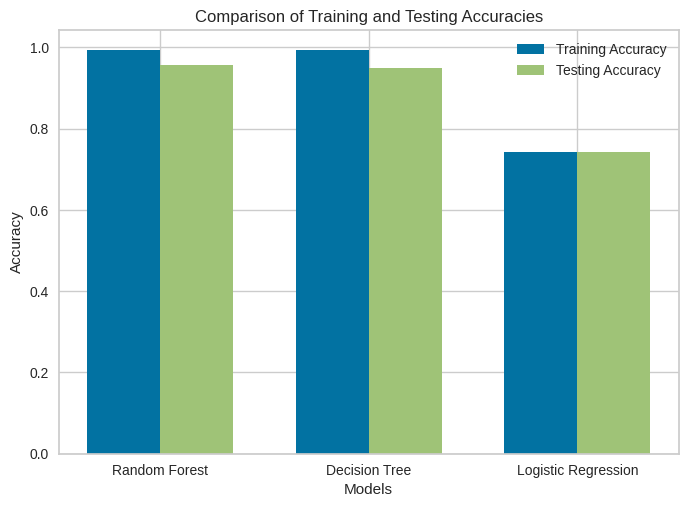

In [ ]:
accuracy_train_rf = accuracy_score(Y_train, train_pred_rfc)
accuracy_test_rf = accuracy_score(Y_test, y_pred_rfc)

accuracy_train_dt = accuracy_score(Y_train, train_pred_dtc)
accuracy_test_dt = accuracy_score(Y_test, y_pred_dtc)

accuracy_train_lr = accuracy_score(Y_train, train_pred_lrc)
accuracy_test_lr = accuracy_score(Y_test, y_pred_lrc)

# Plot grouped bar chart for training and testing accuracies
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
train_accuracies = [accuracy_train_rf, accuracy_train_dt, accuracy_train_lr]
test_accuracies = [accuracy_test_rf, accuracy_test_dt, accuracy_test_lr]

bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, train_accuracies, bar_width, label='Training Accuracy')
bar2 = ax.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()

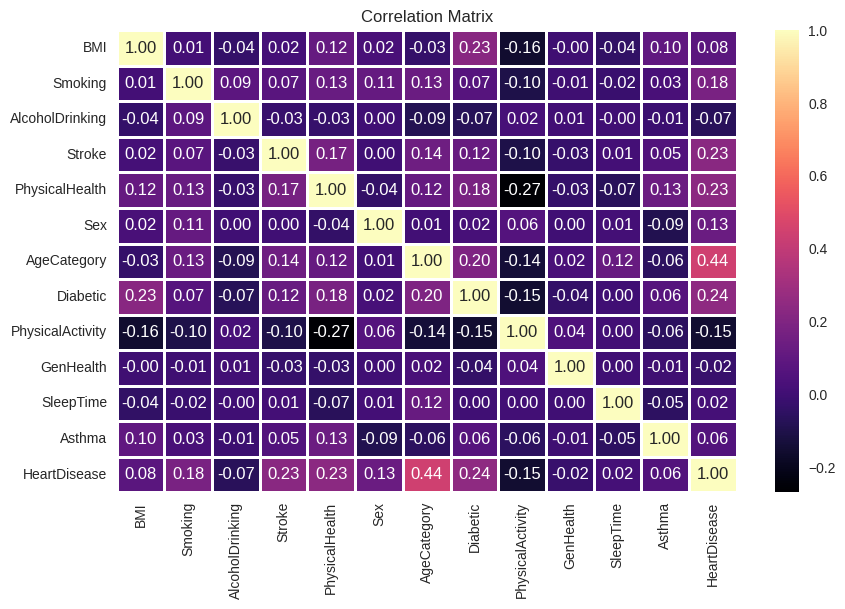

In [ ]:
corrmatrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corrmatrix, annot=True, cmap='magma', fmt=".2f", linewidths=2.0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
'''import pickle

filename = 'RandomForestModel.sav'
pickle.dump(rfc, open(filename,'wb'))

loaded_model = pickle.load(open('RandomForestModel.sav','rb'))

input_data = (26.6,1,0,1,20,1,11,2,0,1,10,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
Prediction = loaded_model.predict(input_data_reshaped)
print(Prediction)'''

"import pickle\n\nfilename = 'RandomForestModel.sav'\npickle.dump(rfc, open(filename,'wb'))\n\nloaded_model = pickle.load(open('RandomForestModel.sav','rb'))\n\ninput_data = (26.6,1,0,1,20,1,11,2,0,1,10,1)\ninput_data_as_numpy_array = np.asarray(input_data)\ninput_data_reshaped = input_data_as_numpy_array.reshape(1,-1)\nPrediction = loaded_model.predict(input_data_reshaped)\nprint(Prediction)"

In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop('index',axis=1)
df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
0,16.60,1,0,0,3.0,0,7,2,1,4,5.0,1,0
1,20.34,0,0,1,0.0,0,12,0,1,4,7.0,0,0
2,26.58,1,0,0,20.0,1,9,2,1,1,8.0,1,0
3,24.21,0,0,0,0.0,0,11,0,0,2,6.0,0,0
4,23.71,0,0,0,28.0,0,4,0,1,4,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,29.29,1,0,0,0.0,0,10,2,0,2,7.0,0,1
548908,29.83,0,0,0,0.0,0,8,2,1,2,7.0,1,1
548909,22.27,1,0,0,0.0,0,4,2,1,2,6.0,1,1
548910,26.61,1,0,1,20.0,1,11,2,0,1,10.0,1,1


from matplotlib import pyplot as plt
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Smoking'].plot(kind='hist', bins=20, title='Smoking')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['AlcoholDrinking'].plot(kind='hist', bins=20, title='AlcoholDrinking')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Stroke'].plot(kind='hist', bins=20, title='Stroke')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BMI', y='Smoking', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Smoking', y='AlcoholDrinking', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='AlcoholDrinking', y='Stroke', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Stroke', y='PhysicalHealth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SleepTime']
  ys = series['BMI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('SleepTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SleepTime')
_ = plt.ylabel('BMI')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SleepTime']
  ys = series['Smoking']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('SleepTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SleepTime')
_ = plt.ylabel('Smoking')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SleepTime']
  ys = series['AlcoholDrinking']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('SleepTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SleepTime')
_ = plt.ylabel('AlcoholDrinking')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SleepTime']
  ys = series['Stroke']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('SleepTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SleepTime')
_ = plt.ylabel('Stroke')

from matplotlib import pyplot as plt
df['BMI'].plot(kind='line', figsize=(8, 4), title='BMI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Smoking'].plot(kind='line', figsize=(8, 4), title='Smoking')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['AlcoholDrinking'].plot(kind='line', figsize=(8, 4), title='AlcoholDrinking')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Stroke'].plot(kind='line', figsize=(8, 4), title='Stroke')
plt.gca().spines[['top', 'right']].set_visible(False)

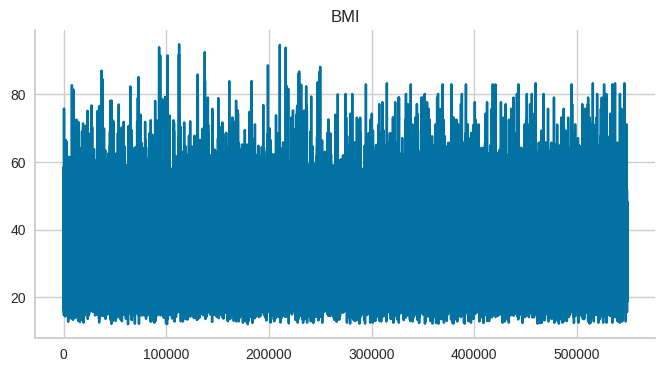

In [ ]:
from matplotlib import pyplot as plt
df['BMI'].plot(kind='line', figsize=(8, 4), title='BMI')
plt.gca().spines[['top', 'right']].set_visible(False)

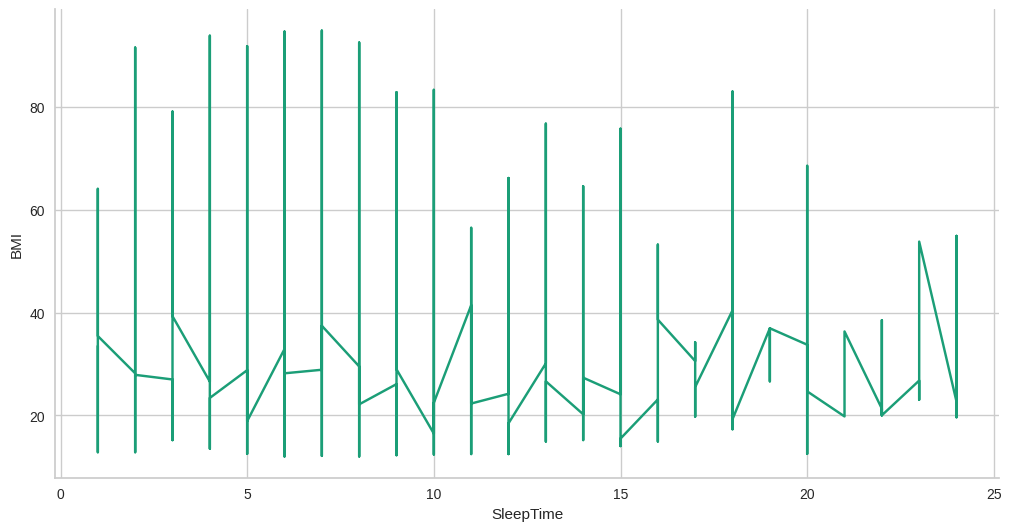

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SleepTime']
  ys = series['BMI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('SleepTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SleepTime')
_ = plt.ylabel('BMI')

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


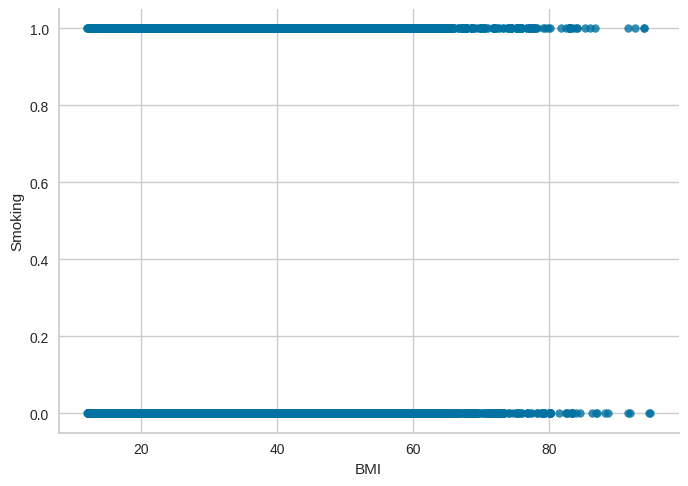

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BMI', y='Smoking', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

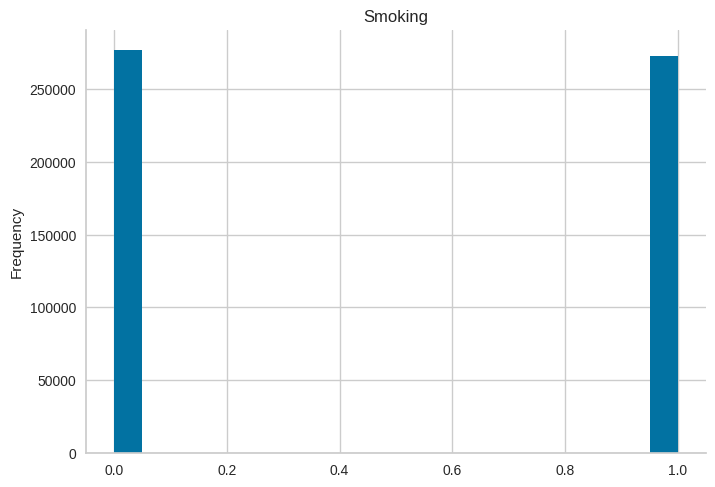

In [ ]:
from matplotlib import pyplot as plt
df['Smoking'].plot(kind='hist', bins=20, title='Smoking')
plt.gca().spines[['top', 'right',]].set_visible(False)

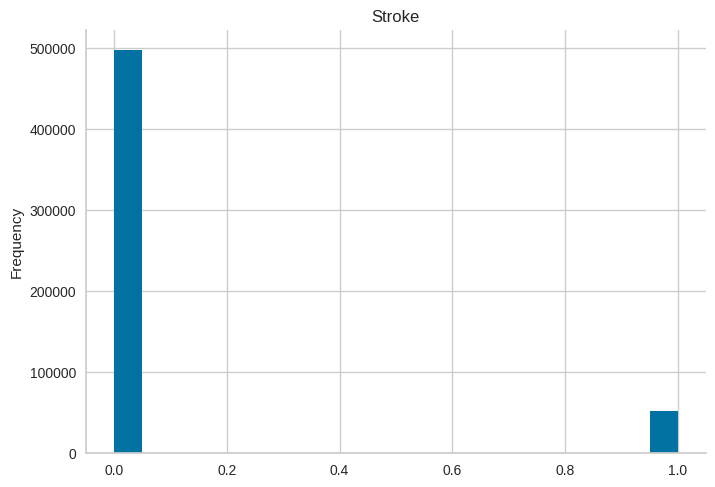

In [ ]:
from matplotlib import pyplot as plt
df['Stroke'].plot(kind='hist', bins=20, title='Stroke')
plt.gca().spines[['top', 'right',]].set_visible(False)

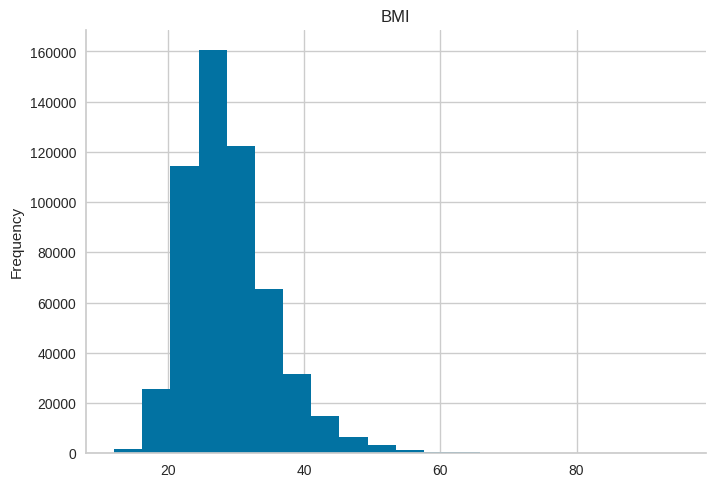

In [ ]:
from matplotlib import pyplot as plt
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

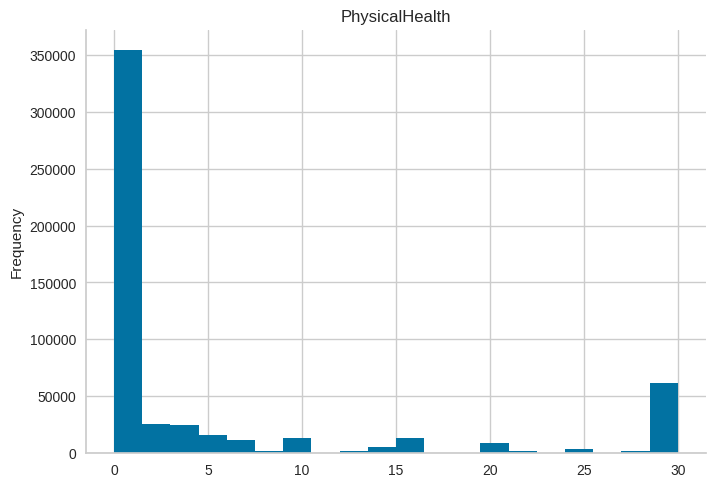

In [ ]:
from matplotlib import pyplot as plt
df['PhysicalHealth'].plot(kind='hist', bins=20, title='PhysicalHealth')
plt.gca().spines[['top', 'right',]].set_visible(False)

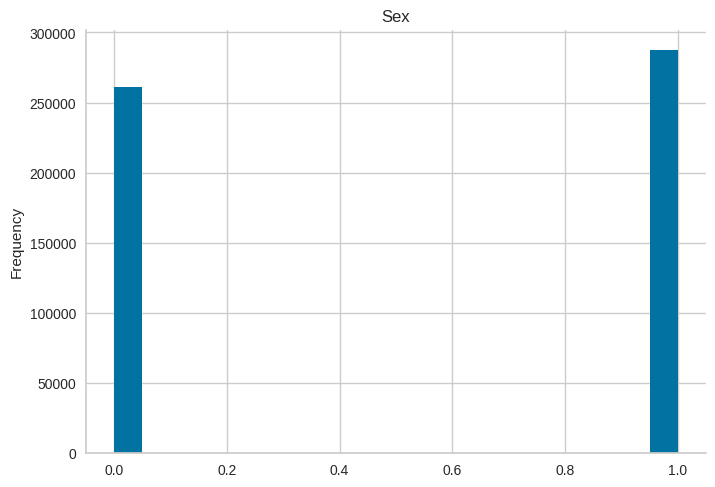

In [ ]:
from matplotlib import pyplot as plt
df['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

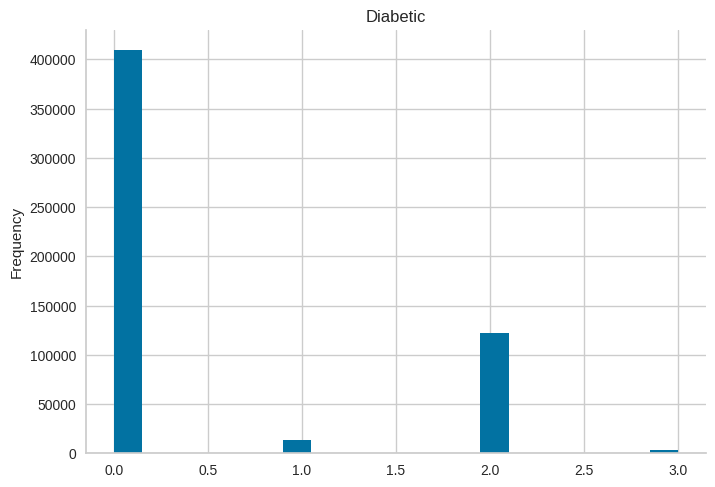

In [ ]:
from matplotlib import pyplot as plt
df['Diabetic'].plot(kind='hist', bins=20, title='Diabetic')
plt.gca().spines[['top', 'right',]].set_visible(False)

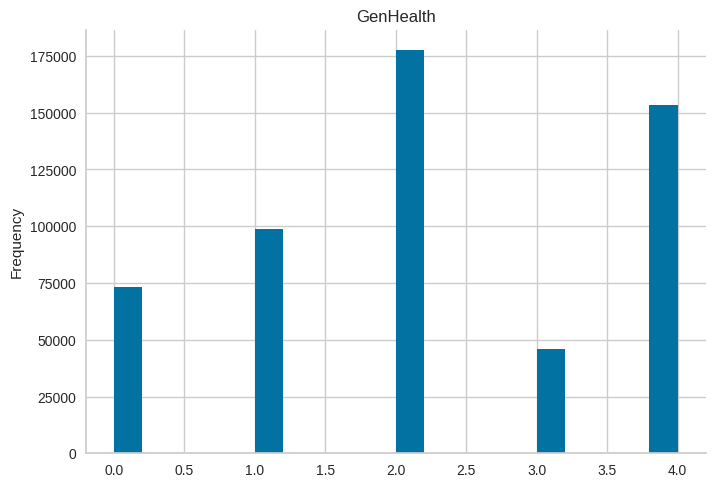

In [ ]:
from matplotlib import pyplot as plt
df[''].plot(kind='hist', bins=20, title='GenHealth')
plt.gca().spines[['top', 'right',]].set_visible(False)